In [1]:
%%html
<style>
table {display: block;}
td {
  font-size: 18px
}
.rendered_html { font-size: 18px; }
*{ line-height: 200%; }
</style>

# Natural Language Processing and the Web WS 2024/25 - Practice Class - <span style="color:blue">Week 02</span>

## Content
In this practice class, we will discuss the following main points
* Web scrapping and CSV File handling
* Text  <span style="color:blue">Segmentation</span>,  <span style="color:blue">lemmatization</span>,  <span style="color:blue">stemming</span>
* <span style="color:blue">Part of speech tagging</span> 

## How to read data from web page content
The standard <span style="color:blue">[requests](https://docs.python-requests.org/en/latest/index.html)</span> library can be  used to retrieve content from a web page. Lets see some of the methods for the <span style="color:blue">GET</span> HTTP action. A better way of retrieving web content will be discussed later, mainly using different packages.

In [81]:
!python -m pip install requests

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# requests is the standard html library to make HTTP requests
import requests
link1 = "https://en.wikipedia.org/wiki/Natural_language_processing"

# get is an HTTP method to retrieve data from a specified resource
# response is an HTTP "Response" object to inspect the request
response = requests.get(link1)
# HTTP status code, example 200 is an ok status, 404 is not found status code
status = response.status_code
print(status)

200


### Response object content
You can read the content of webpage in different ways, depending on type of content
- text  
- bytes 
- json 
- raw 

In [4]:
# the information obtained from the resource, a payload in the form of string
url = "https://en.wikipedia.org/wiki/Natural_language_processing"
response = requests.get(url)

content = response.text
print (type(content))
print("====")
print (content)

<class 'str'>
====
<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Natural language processing - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limi

In [5]:
# pprint is a nice method to print python data structures
import pprint
url = "https://api.github.com/events"
response = requests.get(url)

content = response.json()
pprint.pp(content)

[{'id': '43156899902',
  'type': 'CreateEvent',
  'actor': {'id': 4437993,
            'login': 'mushrifali',
            'display_login': 'mushrifali',
            'gravatar_id': '',
            'url': 'https://api.github.com/users/mushrifali',
            'avatar_url': 'https://avatars.githubusercontent.com/u/4437993?'},
  'repo': {'id': 877733527,
           'name': 'mushrifali/text-editor',
           'url': 'https://api.github.com/repos/mushrifali/text-editor'},
  'payload': {'ref': 'main',
              'ref_type': 'branch',
              'master_branch': 'main',
              'description': 'text-editor',
              'pusher_type': 'user'},
  'public': True,
  'created_at': '2024-10-24T06:40:27Z'},
 {'id': '43156899888',
  'type': 'IssueCommentEvent',
  'actor': {'id': 18297,
            'login': 'hfu',
            'display_login': 'hfu',
            'gravatar_id': '',
            'url': 'https://api.github.com/users/hfu',
            'avatar_url': 'https://avatars.githubuserc

#### **Let say you need to read an image:** [source url](https://avatars.githubusercontent.com/u/17572818)
read it as bytes rather than text

In [6]:
# the information obtained from the resource, a payload in the form of bytes

import requests
url = "https://avatars.githubusercontent.com/u/17572818"

response = requests.get(url)
response.content

b'\xff\xd8\xff\xdb\x00\x84\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01\xcc\x01\xcc\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x01\xa2\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf1\xf2\xf3\xf4\xf

In [7]:
from PIL import Image
from io import BytesIO

url = "https://avatars.githubusercontent.com/u/17572818"
response = requests.get(url)

im = Image.open(BytesIO(response.content))
print(im)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=460x460 at 0xFFFF9172B410>


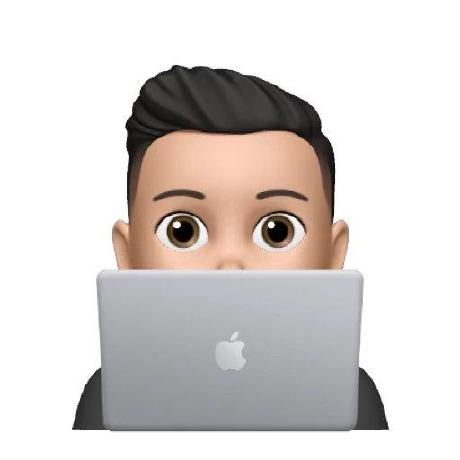

In [8]:
# im.show() # will open a new window
im # to show inline

Let say we want to download very large files e.g. from [google ngrams](https://storage.googleapis.com/books/ngrams/books/datasetsv3.html) data source.

For such scenarios, it is preferred to not read them at once into memory, but rather read chunk wise

In [9]:
import requests
url = "http://storage.googleapis.com/books/ngrams/books/googlebooks-eng-all-1gram-20120701-z.gz"
response = requests.get(url, stream=True)

In [10]:
filename = "data/googlebooks-eng-all-1gram-20120701-z.gz"
with open(filename, 'wb') as fd:
    for chunk in response.iter_content(chunk_size=512):
        fd.write(chunk)

In [11]:
import gzip
with gzip.open(filename, mode="rt") as fp:
    for idx, line in enumerate(fp):
        print(line)
        if idx == 5:
            break

Z'A_NUM	1838	1	1

Z'A_NUM	1847	1	1

Z'A_NUM	1857	1	1

Z'A_NUM	1897	1	1

Z'A_NUM	1899	1	1

Z'A_NUM	1925	1	1



### Encoding and Headers

In [12]:
url = "https://en.wikipedia.org/wiki/Natural_language_processing"
response = requests.get(url)

# Examine which encoding the request determines for the response
encoding = response.encoding
print(encoding)

UTF-8


In [13]:
# Specify the encoding of the response manually
response.encoding = "utf-8"

# Examine all the header information
headers = response.headers
print (headers)

{'date': 'Thu, 24 Oct 2024 06:36:35 GMT', 'vary': 'Accept-Encoding,Cookie,Authorization', 'server': 'ATS/9.2.5', 'x-content-type-options': 'nosniff', 'content-language': 'en', 'accept-ch': '', 'last-modified': 'Sun, 20 Oct 2024 00:40:49 GMT', 'content-type': 'text/html; charset=UTF-8', 'content-encoding': 'gzip', 'age': '536', 'x-cache': 'cp3071 hit, cp3071 hit/8', 'x-cache-status': 'hit-front', 'server-timing': 'cache;desc="hit-front", host;desc="cp3071"', 'strict-transport-security': 'max-age=106384710; includeSubDomains; preload', 'report-to': '{ "group": "wm_nel", "max_age": 604800, "endpoints": [{ "url": "https://intake-logging.wikimedia.org/v1/events?stream=w3c.reportingapi.network_error&schema_uri=/w3c/reportingapi/network_error/1.0.0" }] }', 'nel': '{ "report_to": "wm_nel", "max_age": 604800, "failure_fraction": 0.05, "success_fraction": 0.0}', 'set-cookie': 'WMF-Last-Access=24-Oct-2024;Path=/;HttpOnly;secure;Expires=Mon, 25 Nov 2024 00:00:00 GMT, WMF-Last-Access-Global=24-Oct-

In [14]:
# determine the type of the content. For example, if you chose link1, it is an html type while link2 is json
contentType = response.headers.get('content-type')
print(contentType)

text/html; charset=UTF-8


In [15]:
url = "https://api.github.com"
response = requests.get(url)

headers = response.headers
print(headers)
print("====")
contentType = response.headers.get('content-type')
print(contentType)

{'Date': 'Thu, 24 Oct 2024 06:45:23 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Cache-Control': 'public, max-age=60, s-maxage=60', 'Vary': 'Accept,Accept-Encoding, Accept, X-Requested-With', 'ETag': 'W/"4f825cc84e1c733059d46e76e6df9db557ae5254f9625dfe8e1b09499c449438"', 'X-GitHub-Media-Type': 'github.v3; format=json', 'x-github-api-version-selected': '2022-11-28', 'Access-Control-Expose-Headers': 'ETag, Link, Location, Retry-After, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Used, X-RateLimit-Resource, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval, X-GitHub-Media-Type, X-GitHub-SSO, X-GitHub-Request-Id, Deprecation, Sunset', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31536000; includeSubdomains; preload', 'X-Frame-Options': 'deny', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '0', 'Referrer-Policy': 'origin-when-cross-origin, strict-origin-when-cross-origin', 'Content-Security

## HTML/XML parsing using [<span style="color:blue">BeautifulSoup</span>](https://beautiful-soup-4.readthedocs.io/en/latest/)
This library can be used to process HTML and XML files, combined with <span style="color:blue">requests</span>  module it can be used as a web scrapper tool.

Example page: https://www.crummy.com/software/BeautifulSoup/

In [16]:
# Install bs4 package
!pip install beautifulsoup4

Defaulting to user installation because normal site-packages is not writeable


In [17]:
# Reading web content using BeautifulSoup
from bs4 import BeautifulSoup
page = requests.get("https://www.crummy.com/software/BeautifulSoup/")
soup = BeautifulSoup(page.content, 'html.parser')
# Display the content of the page - html
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN"
"http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Beautiful Soup: We called him Tortoise because he taught us.
  </title>
  <link href="mailto:leonardr@segfault.org" rev="made"/>
  <link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
  <meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
  <meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
  <meta content="Leonard Richardson" name="author"/>
 </head>
 <body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
  <style>
   #tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}
  </style>
  <img align="right" src="1

In [18]:
# Get only the text content of the page
print(soup.text)





Beautiful Soup: We called him Tortoise because he taught us.









[ Download | Documentation | Hall of Fame | For enterprise | Source | Changelog | Discussion group  | Zine ]

Beautiful Soup

You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-turnaround
screen scraping projects.
Beautiful Soup is a Python library designed for quick turnaround
projects like screen-scraping. Three features make it powerful:


Beautiful Soup provides a few simple methods and Pythonic idioms
for navigating, searching, and modifying a parse tree: a toolkit for
dissecting a document and extracting what you need. It doesn't take
much code to write an application

Beautiful Soup automatically converts incoming documents to
Unicode and outgoing documents to UTF-8. You don't have to think
about encodings, unless the document doesn't specify an encoding and
Beautiful Soup c

### Navigate the DOM structure of document
Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: <span style="color:blue">Tag</span>, <span style="color:blue">NavigableString</span>, and <span style="color:blue">Comment</span>.

<span style="color:blue">Tag</span> corresponds to an XML or HTML tag in the original document, like title, h1, div etc. 

<span style="color:blue">NavigableString</span> corresponds to a bit of text within a tag. Beautiful Soup uses the NavigableString class to contain these bits of text.

### Navigation using <span style="color:blue">Tag</span> names

In [19]:
soup.title # tag including all content

<title>Beautiful Soup: We called him Tortoise because he taught us.</title>

In [20]:
soup.title.name # name of tag

'title'

In [21]:
soup.title.string # text within tag


'Beautiful Soup: We called him Tortoise because he taught us.'

In [22]:
type(soup.title.string) # NavigableString

bs4.element.NavigableString

In [23]:
soup.head

<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link href="mailto:leonardr@segfault.org" rev="made"/>
<link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
<meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
<meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
<meta content="Leonard Richardson" name="author"/>
</head>

In [24]:
soup.body

<body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
<style>
#tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}
</style>
<img align="right" src="10.1.jpg" width="250"/><br/>
<p>[ <a href="#Download">Download</a> | <a href="bs4/doc/">Documentation</a> | <a href="#HallOfFame">Hall of Fame</a> | <a href="enterprise.html">For enterprise</a> | <a href="https://code.launchpad.net/beautifulsoup">Source</a> | <a href="https://git.launchpad.net/beautifulsoup/tree/CHANGELOG">Changelog</a> | <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">Discussion group</a>  | <a href="zine/">Zine</a> ]</p>
<div align="center">
<a href="bs4/download/"><h1>Beautiful Soup</h1></a>
</div>
<p>You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, i

In [25]:
soup.p.text # first instance of p tag

'[ Download | Documentation | Hall of Fame | For enterprise | Source | Changelog | Discussion group  | Zine ]'

In [26]:
soup.a # first instance of a tag

<a href="#Download">Download</a>

In [27]:
soup.find_all("a") # find all a tags

[<a href="#Download">Download</a>,
 <a href="bs4/doc/">Documentation</a>,
 <a href="#HallOfFame">Hall of Fame</a>,
 <a href="enterprise.html">For enterprise</a>,
 <a href="https://code.launchpad.net/beautifulsoup">Source</a>,
 <a href="https://git.launchpad.net/beautifulsoup/tree/CHANGELOG">Changelog</a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">Discussion group</a>,
 <a href="zine/">Zine</a>,
 <a href="bs4/download/"><h1>Beautiful Soup</h1></a>,
 <a href="http://lxml.de/">lxml</a>,
 <a href="http://code.google.com/p/html5lib/">html5lib</a>,
 <a href="bs4/doc/">Read more.</a>,
 <a href="https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&amp;utm_medium=referral&amp;utm_campaign=enterprise" target="_blank">
 <span class="cta">
   Beautiful Soup for enterprise available via Tidelift
  </span>
 </a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">the discussion
 group</a>,
 <a href="https:

In [28]:
for p in soup.find_all('p'):
   print(p.text)

[ Download | Documentation | Hall of Fame | For enterprise | Source | Changelog | Discussion group  | Zine ]
You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-turnaround
screen scraping projects.
Beautiful Soup is a Python library designed for quick turnaround
projects like screen-scraping. Three features make it powerful:


Beautiful Soup provides a few simple methods and Pythonic idioms
for navigating, searching, and modifying a parse tree: a toolkit for
dissecting a document and extracting what you need. It doesn't take
much code to write an application

Beautiful Soup automatically converts incoming documents to
Unicode and outgoing documents to UTF-8. You don't have to think
about encodings, unless the document doesn't specify an encoding and
Beautiful Soup can't detect one. Then you just have to specify the
original encoding.

Beautiful Soup sits 

### Navigation using <span style="color:blue">.content</span> and <span style="color:blue">.children</span>

<span style="color:blue">.descendants</span>:  content and children only return direct children of the tag, to get all children in a recursive manner, use dedcendants instead
 

In [29]:
# list all the available elements in the page using soup.children
[type(item) for item in list(soup.children)]

[bs4.element.Doctype,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString]

In [30]:
# The third (index 2) element is the HTML tag
print(list(soup.children)[2].name)

html


In [31]:
# get the sub-tags under the HTML tag
html = list(soup.children)[2]
list(html.children) # contains the head and body sub tags

['\n',
 <head>
 <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 <title>Beautiful Soup: We called him Tortoise because he taught us.</title>
 <link href="mailto:leonardr@segfault.org" rev="made"/>
 <link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
 <meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
 <meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
 <meta content="Leonard Richardson" name="author"/>
 </head>,
 '\n',
 <body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
 <style>
 #tidelift { }
 
 #tidelift a {
  border: 1px solid #666666;
  margin-left: auto;
  padding: 10px;
  text-decoration: none;
 }
 
 #tidelift .cta {
  background: url("tidelift.svg") no-repeat;
  padding-left: 30px;
 }
 </style>
 <img align="right" src="10.1.jpg" width="250"/><br/>
 <p>[ <a href="#Download">Download</a> | <a href="bs4/doc/">Documentation</a> | <a hr

In [32]:
list(html.contents) # same as children

['\n',
 <head>
 <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 <title>Beautiful Soup: We called him Tortoise because he taught us.</title>
 <link href="mailto:leonardr@segfault.org" rev="made"/>
 <link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
 <meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
 <meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
 <meta content="Leonard Richardson" name="author"/>
 </head>,
 '\n',
 <body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
 <style>
 #tidelift { }
 
 #tidelift a {
  border: 1px solid #666666;
  margin-left: auto;
  padding: 10px;
  text-decoration: none;
 }
 
 #tidelift .cta {
  background: url("tidelift.svg") no-repeat;
  padding-left: 30px;
 }
 </style>
 <img align="right" src="10.1.jpg" width="250"/><br/>
 <p>[ <a href="#Download">Download</a> | <a href="bs4/doc/">Documentation</a> | <a hr

In [33]:
body = list(html.children)[3]
# OR
# body = soup.body

In [34]:
# Get all the sub-tags under body
for tag in list(body.children):
    if tag.name:
        print (tag.name)

style
img
br
p
div
p
p


In [35]:
for tag in list(body.descendants):
    if tag.name:
        print (tag.name)

style
img
br
p
a
a
a
a
a
a
a
a
div
a
h1
p
p
ol
li
li
li
a
a
p
tt
p
p
a
h3
div
a
span
p
a
a
a
p
a
p
a
i
a
h2
p
a
code
p
code
code
p
code
p
h3
p
p
a
p
a
code
code
code
p
p
a
a
h2
p
ul
li
a
li
a
a
li
a
li
a
li
a
li
a
a
li
a
a
p
a
h2
p
a
a
a
hr
table
tr
td
p
a
a
p
table
tr
td
a
img
td
a
td
p
b
dl
dd
a
dl
dd
a
dl
dd
a
form
input


In [36]:
# Get all the text under the p tags
# for tag in list(body.contents):
for tag in list(body.children):
    if tag.name and tag.name == 'p':
        print (tag.text)

[ Download | Documentation | Hall of Fame | For enterprise | Source | Changelog | Discussion group  | Zine ]
You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-turnaround
screen scraping projects.
Beautiful Soup is a Python library designed for quick turnaround
projects like screen-scraping. Three features make it powerful:


Beautiful Soup provides a few simple methods and Pythonic idioms
for navigating, searching, and modifying a parse tree: a toolkit for
dissecting a document and extracting what you need. It doesn't take
much code to write an application

Beautiful Soup automatically converts incoming documents to
Unicode and outgoing documents to UTF-8. You don't have to think
about encodings, unless the document doesn't specify an encoding and
Beautiful Soup can't detect one. Then you just have to specify the
original encoding.

Beautiful Soup sits 

### Going up and sideways
More details to further look into:
>```python
tag.parent  # direct parent
tag.parents # all parents
tag.next_sibling and tag.next_siblings
tag.previous_sibling and tag.previous_siblings
tag.next_element and tag.previous_element
tag.next_elements and tag.previous_elements
>```

https://beautiful-soup-4.readthedocs.io/en/latest/index.html?highlight=find#quick-start

### Searching
There are two methods that you can use to search for specific tags: <span style="color:blue">find()</span> and <span style="color:blue">find_all() </span>

These methods can be called on bs4 soup object or a tag as well.

You can use tag name, or their id to find the tags, CSS classes can also be used to find along with tag names. For details check https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-all.

In [37]:
soup.find("h2") # using tag name

<h2>Download Beautiful Soup</h2>

In [38]:
soup.find_all("h2")

[<h2>Download Beautiful Soup</h2>, <h2>Hall of Fame</h2>, <h2>Development</h2>]

In [39]:
soup.find_all(["h1", "h2"]) # list if tag names

[<h1>Beautiful Soup</h1>,
 <h2>Download Beautiful Soup</h2>,
 <h2>Hall of Fame</h2>,
 <h2>Development</h2>]

In [40]:
soup.find_all(id="link") # keyword argument

[]

In [41]:
soup.find_all(class_="licenseText") # using CSS class, since class is reserved keyword in python, bs4 uses class_

[<table class="licenseText"><tr><td><a href="http://creativecommons.org/licenses/by-sa/2.0/"><img border="0" src="/nb//resources/img/somerights20.jpg"/></a></td><td valign="top">Crummy is © 1996-2024 Leonard Richardson. Unless otherwise noted, all text licensed under a <a href="http://creativecommons.org/licenses/by-sa/2.0/">Creative Commons License</a>.</td></tr></table>]

In [42]:
url = "https://news.ycombinator.com/"
soup2 = BeautifulSoup(requests.get(url).content, "html.parser")
articles = soup2.find_all(class_="athing")
for article in articles:
    print(article.text)


1. AWS data center latencies, visualized (benjdd.com)

2. Show HN: Wall-mounted diffusion mirror that turns reflections into paintings (matthieulc.com)

3. Pretty.c (github.com/aartaka)

4. Show HN: RF Hunter – Find hidden cameras and other devices (github.com/ramborogers)

5. Everything I built with Claude Artifacts this week (simonwillison.net)

6. NetGuard – rootless Android outbound per-app OSS firewall, like LittleSnitch (netguard.me)

7. Playstation Vita Architecture (Part 1) (copetti.org)

8. What happens when you make a move in lichess.org? (davidreis.me)

9. How do merging supermassive black holes pass the final parsec? (quantamagazine.org)

10. Necromanteion of Acheron (wikipedia.org)

11. Show HN: Open-source low-code email editor (github.com/dittofeed)

12. Fearless SSH: Short-lived certificates bring Zero Trust to infrastructure (cloudflare.com)

13. Async Rust in Three Parts (jacko.io)

14. TSMC cuts off client after discovering chips sent to Huawei (bloomberg.com)

15. 

### More advanced scrapping frameworks in Python
* Scrapy - https://github.com/scrapy/scrapy
* Crawlee - https://github.com/apify/crawlee
#### Check this tutorial for a more feature complete example of scrapping with beautiful soup:
https://blog.apify.com/web-scraping-with-beautiful-soup/

## Reading and  writing <span style="color:blue">CSV</span> files.
CSV files are comma delimited files that can be used to store structured files in the form of lists. It might contain headers, and the header as well as individual records are separated by new lines. In general delimiters can be also user defined.

You can use the <span style="color:blue">csv</span> library to process CSV  files.
>```python
import csv
with open('csvfilename', 'r') as fp:
    reader = csv.reader(fp, delimiter=',')
    next(reader) # if file has a header row and need to be skipped
    for line in reader:
        print(line)
        # process line
>```

    

### Read

In [43]:
# Read personal information: name.csv is obtained from https://github.com/CoreyMSchafer/code_snippets/blob/master/Python-CSV/names.csv
import csv
with open('data/names.csv','r') as csv_names:
    name_reader = csv.reader(csv_names, delimiter=',')
    # skip the header
    h = next(name_reader)
    print(h)
    for name in name_reader:
        print(name)

['first_name', 'last_name', 'email']
['John', 'Doe', 'john-doe@bogusemail.com']
['Mary', 'Smith-Robinson', 'maryjacobs@bogusemail.com']
['Dave', 'Smith', 'davesmith@bogusemail.com']
['Jane', 'Stuart', 'janestuart@bogusemail.com']
['Tom', 'Wright', 'tomwright@bogusemail.com']
['Steve', 'Robinson', 'steverobinson@bogusemail.com']
['Nicole', 'Jacobs', 'nicolejacobs@bogusemail.com']
['Jane', 'Wright', 'janewright@bogusemail.com']
['Jane', 'Doe', 'janedoe@bogusemail.com']
['Kurt', 'Wright', 'kurtwright@bogusemail.com']
['Kurt', 'Robinson', 'kurtrobinson@bogusemail.com']
['Jane', 'Jenkins', 'janejenkins@bogusemail.com']
['Neil', 'Robinson', 'neilrobinson@bogusemail.com']
['Tom', 'Patterson', 'tompatterson@bogusemail.com']
['Sam', 'Jenkins', 'samjenkins@bogusemail.com']
['Steve', 'Stuart', 'stevestuart@bogusemail.com']
['Maggie', 'Patterson', 'maggiepatterson@bogusemail.com']
['Maggie', 'Stuart', 'maggiestuart@bogusemail.com']
['Jane', 'Doe', 'janedoe@bogusemail.com']
['Steve', 'Patterson', '

### Write

In [44]:
# Re-write the csv file with a different delimiter
with open('data/names.csv','r') as csv_names:
    name_reader = csv.reader(csv_names,delimiter=',')
    with open('data/names2.csv','w') as csv_names:
        name_writer = csv.writer(csv_names, delimiter="\t")
        for name in name_reader:
            name_writer.writerow(name)


# NLP Preprocessing

## Tokenization
Tokenization is the first step in almost all NLP applications. It is an important prerequisite for a number of downstream NLP tasks. Consider the following example:
> ``` xx
Mr. O'Neill thinks that the boys' stories about Chile's capital aren't amusing.```

For <span style="color:blue">O'Neill</span> and <span style="color:blue">aren't</span>, which of the following are the desired tokenization?

<span style="color:blue">O'Neill</span>           | <span style="color:blue"> aren't</span>
:-------------------------:|:-------------------------:
![oneil](oneil.png) | ![are](are.png)



## Tokenization with regex

### Sentence segmentation 
Lets assume that the text is properly written English documents. We can build a simple segmenter, that will split the  sentence by <span style="color:blue">a full stop</span>.
>```python
import re
>m = re.split('(\.)', text)```

However, if the text contains `.` which is not the end of the sentence by itself, it will wrongly split them.

Better solution is to use <span style="color:blue">lookahead</span> and <span style="color:blue">lookbehind</span> regex patters.

<span style="color:blue">Lookahead</span> mechanism asserts the presence or absence of certain expressions without consuming the pattern itself.
Positive <span style="color:blue">lookahead</span> is defined with <span style="color:blue">(?=REGEX)</span> while negative <span style="color:blue">lookahead</span> is defined as <span style="color:blue">(?!REGEX)</span>

Example: Match a `q` not followed by a `u`.

`q(?!u)`

Matche a `q` that is followed by a `u`

`q(?=u)`

Positive <span style="color:blue">lookabehind</span> is defined with <span style="color:blue">(?<=REGEX)</span> while negative <span style="color:blue">lookabehind</span> is defined as <span style="color:blue">(?<!REGEX)</span>

In [45]:
import re
#Split sentence with .
text = """Fruits like apple, orange, and mango are healthy. But they are expensive
($1.5/killo), i.e Mrs. Bean can't afford them! However, One can order some online from www.rewe.de.
"""
sents = re.split(r"\.", text) # Add space here and see the effect
for sent in sents:
    print (sent) # What is the problem here?
print("===")
# Find all words that are followed by , or .
# \w+ --> one or more words
#(?=,|\.) --> followed by , or . or !
p = re.compile("\w+(?=,|\.|!)")
print("Lookahead matches", p.findall(text))

Fruits like apple, orange, and mango are healthy
 But they are expensive
($1
5/killo), i
e Mrs
 Bean can't afford them! However, One can order some online from www
rewe
de


===
Lookahead matches ['apple', 'orange', 'healthy', '1', 'i', 'Mrs', 'them', 'However', 'www', 'rewe', 'de']


<>:13: SyntaxWarning: invalid escape sequence '\w'
<>:13: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipykernel_5223/1827437911.py:13: SyntaxWarning: invalid escape sequence '\w'
  p = re.compile("\w+(?=,|\.|!)")


In [46]:
# Sentence splitting using lookbehind and lookahead
print("unsegmented text:", text)
print("===")
# lookahead/lookbehind matchs
# (?<![A-Z][a-z]\.) --> If . is Not behind two characters (first cap, second small). Example  Mr. or Dr. is not end of sentence
# (?<=[\.|?|\!])\s+ --> If . is before one or more spaces
# \s+(?=[A-Z]) --> After the space, the first character should be Capitalized
sents = re.split("(?<![A-Z][a-z]\.)(?<=[\.|?|\!])\s+(?=[A-Z])", text)
for sent in sents:
    print (sent)

unsegmented text: Fruits like apple, orange, and mango are healthy. But they are expensive
($1.5/killo), i.e Mrs. Bean can't afford them! However, One can order some online from www.rewe.de.

===
Fruits like apple, orange, and mango are healthy.
But they are expensive
($1.5/killo), i.e Mrs.
Bean can't afford them!
However, One can order some online from www.rewe.de.



<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_5223/4036005950.py:8: SyntaxWarning: invalid escape sequence '\.'
  sents = re.split("(?<![A-Z][a-z]\.)(?<=[\.|?|\!])\s+(?=[A-Z])", text)


### Word tokenization with regex
Word tokenization for English languages can be attained using white space characters. However, there are still special cases that need to be addressed. 


In [47]:
import re
# English tokenization,
text = """Fruits like apple, orange, and mango are healthy. But they are expensive
($1.5/killo), i.e Mrs. Bean can't afford them! However, One can order some online from www.rewe.de.
"""
tokens = re.split("(\w+|\$[\d\.]+|\S+)", text)
for token in tokens:
    if token.strip():
        print (token) # Can you fix some of the issues?

Fruits
like
apple
,
orange
,
and
mango
are
healthy
.
But
they
are
expensive
($1.5/killo),
i
.e
Mrs
.
Bean
can
't
afford
them
!
However
,
One
can
order
some
online
from
www
.rewe.de.


<>:6: SyntaxWarning: invalid escape sequence '\w'
<>:6: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipykernel_5223/1301594628.py:6: SyntaxWarning: invalid escape sequence '\w'
  tokens = re.split("(\w+|\$[\d\.]+|\S+)", text)


## Tokenization with NLTK
NLTK provides different tokenizers for sentence segmentation and word tokenization, one of the most popular option is [punkt tokenizer](https://www.nltk.org/api/nltk.tokenize.punkt.html) that is available for different languages. It can be downloaded as follows.
>```python
>import nltk
nltk.download("punkt")```

A number of other options are also available like <span style="color:blue">WhitespaceTokenizer </span>, <span style="color:blue">WordPunctTokenizer</span> (punctuation based),  <span style="color:blue">RegexpTokenizer </span> etc, for details check [nltk.tokenize](https://www.nltk.org/api/nltk.tokenize.html)


In [48]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt_tab')
# these two methods use NLTK recommended tokenizers for the mentioned language,
# for sentence it is currently PunktSentenceTokenizer
# for word it is TreebankWordTokenizer

text = """Fruits like apple, orange, and mango are healthy. But they are expensive
($1.5/killo), i.e Mrs. Bean can't afford them! However, One can order some online from www.rewe.de.
"""
sentences = nltk.sent_tokenize(text.strip(), language='english')
for sent in sentences:
    print(sent)

print("-"*20)
tokens = nltk.word_tokenize(text.strip(), language='english')
print(tokens)


Fruits like apple, orange, and mango are healthy.
But they are expensive
($1.5/killo), i.e Mrs. Bean can't afford them!
However, One can order some online from www.rewe.de.
--------------------
['Fruits', 'like', 'apple', ',', 'orange', ',', 'and', 'mango', 'are', 'healthy', '.', 'But', 'they', 'are', 'expensive', '(', '$', '1.5/killo', ')', ',', 'i.e', 'Mrs.', 'Bean', 'ca', "n't", 'afford', 'them', '!', 'However', ',', 'One', 'can', 'order', 'some', 'online', 'from', 'www.rewe.de', '.']


[nltk_data] Downloading package punkt_tab to /home/vscode/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [49]:
text2 = """Die Brände in Brasilien setzen erhebliche Mengen an klimaschädlichen Treibhausgasen frei.
Die Nasa hat nun simuliert, wie sich Kohlenmonoxid über Südamerika ausbreitet. Am Boden schadet
das Gas der Gesundheit erheblich."""


sentences = nltk.sent_tokenize(text2.strip(), language='german')
for sent in sentences:
    print(sent)

print("-"*20)
tokens = nltk.word_tokenize(text2.strip(), language='german')
print(tokens)


Die Brände in Brasilien setzen erhebliche Mengen an klimaschädlichen Treibhausgasen frei.
Die Nasa hat nun simuliert, wie sich Kohlenmonoxid über Südamerika ausbreitet.
Am Boden schadet
das Gas der Gesundheit erheblich.
--------------------
['Die', 'Brände', 'in', 'Brasilien', 'setzen', 'erhebliche', 'Mengen', 'an', 'klimaschädlichen', 'Treibhausgasen', 'frei', '.', 'Die', 'Nasa', 'hat', 'nun', 'simuliert', ',', 'wie', 'sich', 'Kohlenmonoxid', 'über', 'Südamerika', 'ausbreitet', '.', 'Am', 'Boden', 'schadet', 'das', 'Gas', 'der', 'Gesundheit', 'erheblich', '.']


## Tokenization with spaCy

In [50]:
import spacy

# Download the model
!python -m spacy download en_core_web_sm

spacy_en = spacy.load('en_core_web_sm')
doc = spacy_en(text)

for sent in doc.sents:
    print (sent)

print("-"*20)
tokens = [token.text for token in doc]  #How does it compare with the tokens in the regex and NLTK?
print(tokens)

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 9.0 MB/s eta 0:00:00:00:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Fruits like apple, orange, and mango are healthy.
But they are expensive
($1.5/killo), i.e Mrs. Bean can't afford them!
However, One can order some online from www.rewe.de.

--------------------
['Fruits', 'like', 'apple', ',', 'orange', ',', 'and', 'mango', 'are', 'healthy', '.', 'But', 'they', 'are', 'expensive', '\n', '(', '$', '1.5', '/', 'killo', ')', ',', 'i.e', 'Mrs.', 'Bean', 'ca', "n't", 'afford', 'them', '!', 'However', ',', 'One', 'can', 'order', 'some', 'online', 'from', 'www.rewe.de', '.', '\n']


### For more languages, download the respective pretrained model
see the list [here](https://spacy.io/models)

In [51]:
# download german pipline
!python -m spacy download de_core_news_sm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 11.2 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')


In [52]:
import spacy
spacy_de = spacy.load('de_core_news_sm')
doc = spacy_de(text2)

for sent in doc.sents:
    print (sent)

print("-"*20)
tokens = [token.text for token in doc]  #How does it compare with the tokens in the regex and NLTK?
print(tokens)

Die Brände in Brasilien setzen erhebliche Mengen an klimaschädlichen Treibhausgasen frei.

Die Nasa hat nun simuliert, wie sich Kohlenmonoxid über Südamerika ausbreitet.
Am Boden schadet
das Gas der Gesundheit erheblich.
--------------------
['Die', 'Brände', 'in', 'Brasilien', 'setzen', 'erhebliche', 'Mengen', 'an', 'klimaschädlichen', 'Treibhausgasen', 'frei', '.', '\n', 'Die', 'Nasa', 'hat', 'nun', 'simuliert', ',', 'wie', 'sich', 'Kohlenmonoxid', 'über', 'Südamerika', 'ausbreitet', '.', 'Am', 'Boden', 'schadet', '\n', 'das', 'Gas', 'der', 'Gesundheit', 'erheblich', '.']


## Stemming with NLTK
<span style="color:blue">Stemming</span> tries to remove or chops off the end of a word to reduce the word to its base form, somehow a crude approach.

Different stemmers use different rules, e.g.
- PorterStemmer: based on Porter stemming algorithm by Martin Porter, https://tartarus.org/martin/PorterStemmer/
- LancasterStemmer: based on lancaster stemming algorithm by Chris Paice, Source paper: https://dlnext.acm.org/doi/10.1145/101306.101310
- SnowballStemmer: a range of stemmers available for multiple languages, developed by Martin Porter, https://snowballstem.org/algorithms/
- CISTEM Stemmer for German: based on the paper by Leonie Weissweiler and Alexander Fraser, https://www.cis.lmu.de/~weissweiler/cistem/


In [53]:
import nltk
text = """Fruits like apple, orange, and mango are healthy. But they are expensive """

tokens = nltk.word_tokenize(text.strip(), language='english')

porter = nltk.PorterStemmer()

[porter.stem(token) for token in tokens]

['fruit',
 'like',
 'appl',
 ',',
 'orang',
 ',',
 'and',
 'mango',
 'are',
 'healthi',
 '.',
 'but',
 'they',
 'are',
 'expens']

In [54]:
lancaster = nltk.LancasterStemmer()
[lancaster.stem(token) for token in tokens]

['fruit',
 'lik',
 'appl',
 ',',
 'orang',
 ',',
 'and',
 'mango',
 'ar',
 'healthy',
 '.',
 'but',
 'they',
 'ar',
 'expend']

In [55]:
from nltk.stem.snowball import SnowballStemmer
SnowballStemmer.languages


('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

In [56]:
from nltk.stem.snowball import EnglishStemmer
snowball = EnglishStemmer()

print("{0:20}{1:20}{2:20}{3:20}".format("Word","Porter Stemmer","lancaster Stemmer", "snowball Stemmer"))
for word in tokens:
    print("{0:20}{1:20}{2:20}{3:20}".format(word,porter.stem(word),lancaster.stem(word), snowball.stem(word)))

Word                Porter Stemmer      lancaster Stemmer   snowball Stemmer    
Fruits              fruit               fruit               fruit               
like                like                lik                 like                
apple               appl                appl                appl                
,                   ,                   ,                   ,                   
orange              orang               orang               orang               
,                   ,                   ,                   ,                   
and                 and                 and                 and                 
mango               mango               mango               mango               
are                 are                 ar                  are                 
healthy             healthi             healthy             healthi             
.                   .                   .                   .                   
But                 but     

In [57]:
#Example from: https://www.datacamp.com/community/tutorials/stemming-lemmatization-python
#A list of words to be stemmed
word_list = ["friend", "friendship", "friends", "friendships","stabil","destabilize","misunderstanding",
             "railroad","moonlight","football","ill","illness","sick","sickness","hope"]
print("{0:20}{1:20}{2:20}".format("Word","Porter Stemmer","lancaster Stemmer"))
for word in word_list:
    print("{0:20}{1:20}{2:20}".format(word,porter.stem(word),lancaster.stem(word)))

Word                Porter Stemmer      lancaster Stemmer   
friend              friend              friend              
friendship          friendship          friend              
friends             friend              friend              
friendships         friendship          friend              
stabil              stabil              stabl               
destabilize         destabil            dest                
misunderstanding    misunderstand       misunderstand       
railroad            railroad            railroad            
moonlight           moonlight           moonlight           
football            footbal             footbal             
ill                 ill                 il                  
illness             ill                 il                  
sick                sick                sick                
sickness            sick                sick                
hope                hope                hop                 


#### For German language

In [58]:
import nltk
from nltk.stem.snowball import GermanStemmer

#CISTEM Stemmer for German
de_stem = nltk.stem.cistem.Cistem()
de_snowball = GermanStemmer()

text2 = """Die Brände in Brasilien setzen erhebliche Mengen an klimaschädlichen Treibhausgasen frei."""

tokens2 = nltk.word_tokenize(text2.strip(), language='german')


print("{0:20}{1:20}{2:20}".format("Word","Cistem Stemmer","snowball Stemmer"))
for word in tokens2:
    print("{0:20}{1:20}{2:20}".format(word,de_stem.stem(word),de_snowball.stem(word)))

Word                Cistem Stemmer      snowball Stemmer    
Die                 die                 die                 
Brände              brand               brand               
in                  in                  in                  
Brasilien           brasilie            brasili             
setzen              setz                setz                
erhebliche          erheblich           erheb               
Mengen              meng                meng                
an                  an                  an                  
klimaschädlichen    klimaschadlich      klimaschad          
Treibhausgasen      treibhausga         treibhausgas        
frei                frei                frei                
.                   .                   .                   


## Lemmatization
A lemma is the canonical, `uninflected` or `dictionary form` of a word. For example, the lemma of `smallest` is `small,` and the lemma of `eating` is `eat.` In many languages, the lemma for nouns is the `nominative singula`r form, the lemma for adjectives is the ``nominative singular`` positive form, and the lemma for verbs is the `infinitive.` But given an inflected form, finding the lemma (a process called `lemmatization`) is not always as easy. Words often undergo regular spelling changes when inflected for example, in English, verbs and adjectives ending in -e often drop this letter when inflecting: `bake → baking`. Sometimes final consonants are doubled, as in (British) English `travel → travelling`. 

An accurate algorithm for lemmatization must be aware of these sorts of inflectional rules and know how to undo them to arrive at the `base form` of the word. It must also know about completely irregular cases, such as `go → went`, `mouse → mice`, and `good → better`. Lemmatization is a difficult task for computers, and requires some basic understanding of the grammatical context and properties of the word. For example, the lemma of `dove` depends on whether the word is being used as a noun (as in the `bird`) or a verb (as in the past tense of `dive`). However, lemmatization is an important task because, as with part-of-speech tagging, many NLP applications rely on lemmatized text.

Examples of lemmatization:
>```rocks : rock
corpora : corpus
better : good

## NLTK Lemmatizer
Using WordNetLemmatizer

In [59]:
import nltk
nltk.download('wordnet')
# nltk.download('omw-1.4') # if nltk throws exception for this resources, in some versions

[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [60]:
# Lemmatize using WordNet's buil-in morphy function
# Returns the input unchanged if it cannot be found in WordNet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

#Give the POS tag as a context to the tager,  a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos ="a"))

#Lemmatizing sentence
sentence = "The striped bats are hanging on their feet for best"
word_list = nltk.word_tokenize(sentence)
print("words:",word_list)

# Lemmatize list of words and join
lemmatized_output = ' | '.join([lemmatizer.lemmatize(w)  for w in word_list])
print("lemma:",lemmatized_output)

rocks : rock
corpora : corpus
better : good
words: ['The', 'striped', 'bats', 'are', 'hanging', 'on', 'their', 'feet', 'for', 'best']
lemma: The | striped | bat | are | hanging | on | their | foot | for | best


In [61]:
for t in ['is', 'are', 'kill']:
    print(t, lemmatizer.lemmatize(t))

is is
are are
kill kill


## spaCy Lemmatizer

In [62]:
import spacy
# Initialize spacy 'en_core_web_sm' model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
sentence = "The striped bats are hanging on their feet for best"
# Parse the sentence using the loaded 'English' model object `nlp`
doc = nlp(sentence)
# Extract the lemma for each token and join
" |".join([ token.lemma_  for token in doc])

'the |striped |bat |be |hang |on |their |foot |for |good'

In [63]:
import spacy
text2 = "Die Brände in Brasilien setzen erhebliche Mengen an klimaschädlichen Treibhausgasen frei."

nlp_de = spacy.load('de_core_news_sm', disable=['parser', 'ner'])
doc = nlp_de(text2)


" |".join([ token.lemma_  for token in doc])

'der |Brand |in |Brasilien |setzen |erheblich |Menge |an |klimaschädlich |Treibhausgas |frei |--'

## Part of Speech (POS) tagging with NLTK
Part-of-speech tagging (POS tagging) is the process of marking up the words in a text with their corresponding part of speech (e.g., `noun, verb, adjective`). For example, take the following sentence:


 <span style="color:blue">A dog had seen the cutest ferrets.</span>
 
A tokenizer would split it into the following tokens:
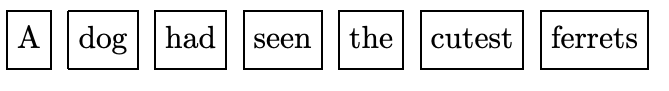
A part-of-speech tagger could then assign labels, or tags, to the tokens according to their respective
parts of speech:
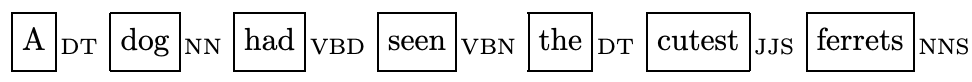
The `Penn Treebank tags` used here are as follows:
`DT` determiner `NN` noun, singular or mass `VBD` verb, past tense
`JJS` adjective, superlative `NNS` noun, plural `VBN` verb, past participle

The inventory from which these POS tags are drawn varies from `language to language`, and from `application to application`.

NLTK includes a Part-of-speech tagger, which assign a <span style="color:blue">tag</span>, or <span style="color:blue">word class</span>, or <span style="color:blue">lexical category</span> for a given token in a text. The default POS tagset for English is based on [<span style="color:blue">PennTreebank tagset</span>](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html). 

NLTK also include the [<span style="color:blue">Universal POS tagset</span>](https://universaldependencies.org/u/pos/)

The [nltk.tag](https://www.nltk.org/_modules/nltk/tag.html) module provides <span style="color:blue">pos_tag</span> function, which works for english and russian by using the recommended **PerceptronTagger** tagger

In [64]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/vscode/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [65]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/vscode/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [66]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
text = "I saw a man sawing the tree with a saw. He can't finish it ontime."
sentences = sent_tokenize(text)

print("{0:15}{1:15}".format("Token","POS tag"))
for sentence in sentences:
    for token, pos in pos_tag(word_tokenize(sentence)):
        print("{0:15}{1:15}".format(token, pos))

# You can also do it without sentence splitting
tagged_tokens = pos_tag(word_tokenize(text))
print(tagged_tokens)
# for token, pos in tagged_tokens:
#         print("{0:15}{1:15}".format(token, pos) )

Token          POS tag        
I              PRP            
saw            VBD            
a              DT             
man            NN             
sawing         VBG            
the            DT             
tree           NN             
with           IN             
a              DT             
saw            NN             
.              .              
He             PRP            
ca             MD             
n't            RB             
finish         VB             
it             PRP            
ontime         RB             
.              .              
[('I', 'PRP'), ('saw', 'VBD'), ('a', 'DT'), ('man', 'NN'), ('sawing', 'VBG'), ('the', 'DT'), ('tree', 'NN'), ('with', 'IN'), ('a', 'DT'), ('saw', 'NN'), ('.', '.'), ('He', 'PRP'), ('ca', 'MD'), ("n't", 'RB'), ('finish', 'VB'), ('it', 'PRP'), ('ontime', 'RB'), ('.', '.')]


In [67]:
nltk.download('tagsets_json')

[nltk_data] Downloading package tagsets_json to
[nltk_data]     /home/vscode/nltk_data...
[nltk_data]   Package tagsets_json is already up-to-date!


True

In [68]:
import nltk
nltk.download('tagsets')
# to get information about a given tag
print("=====")
nltk.help.upenn_tagset("VB")
print("=====")
nltk.help.upenn_tagset("VBG")

=====
VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...
=====
VBG: verb, present participle or gerund
    telegraphing stirring focusing angering judging stalling lactating
    hankerin' alleging veering capping approaching traveling besieging
    encrypting interrupting erasing wincing ...


[nltk_data] Downloading package tagsets to /home/vscode/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


#### Using different tagset

In [69]:
# you can also decide to use the Universal POS tagset
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('universal_tagset')

text = "I saw a man sawing the tree with a saw. He can't finish it ontime."
sentences = sent_tokenize(text)

print("{0:15}{1:15}".format("Token","POS tag"))
for sentence in sentences:
    for token, pos in pos_tag(word_tokenize(sentence), tagset='universal'):
        print("{0:15}{1:15}".format(token, pos) )

Token          POS tag        
I              PRON           
saw            VERB           
a              DET            
man            NOUN           
sawing         VERB           
the            DET            
tree           NOUN           
with           ADP            
a              DET            
saw            NOUN           
.              .              
He             PRON           
ca             VERB           
n't            ADV            
finish         VERB           
it             PRON           
ontime         ADV            
.              .              


[nltk_data] Downloading package universal_tagset to
[nltk_data]     /home/vscode/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


### POS tagging for list of sentences

In [70]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tag import pos_tag, pos_tag_sents

text = "I saw a man sawing the tree with a saw. He can't finish it ontime."
sentences = [word_tokenize(s) for s in sent_tokenize(text)]
tagged_sentences = pos_tag_sents(sentences)

for sentence in tagged_sentences:
    print(sentence)


[('I', 'PRP'), ('saw', 'VBD'), ('a', 'DT'), ('man', 'NN'), ('sawing', 'VBG'), ('the', 'DT'), ('tree', 'NN'), ('with', 'IN'), ('a', 'DT'), ('saw', 'NN'), ('.', '.')]
[('He', 'PRP'), ('ca', 'MD'), ("n't", 'RB'), ('finish', 'VB'), ('it', 'PRP'), ('ontime', 'RB'), ('.', '.')]


### WordNet Lemmatizer with appropriate POS tag

wordnet pos tags are: noun (n), verb(v) , adj(a) and adv (r)

In [71]:
# Lemmatize with POS Tag
from nltk.corpus import wordnet
# wordnet pos tags are: noun (n), verb(v) , adj(a) and adv (r)
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()
# 2. Lemmatize Single Word with the appropriate POS tag
word = 'feet'
print(lemmatizer.lemmatize(word, get_wordnet_pos(word)))
# 3. Lemmatize a Sentence with the appropriate POS tag
sentence = "The striped bats are hanging on their feet for best"
print([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)])


foot
['The', 'strip', 'bat', 'be', 'hang', 'on', 'their', 'foot', 'for', 'best']


## POS tagging with spaCy

In [72]:
import spacy
import pprint
# Load English tokenizer, tagger,
# parser, NER and word vectors
nlp = spacy.load("en_core_web_sm")
text = "I saw a man sawing the tree with a saw. He can't finish it ontime!"
doc = nlp(text)
# Print token and Tag
for token in doc:
    print(token, token.pos_)


print('-'*20)
# Example list of Verb tokens
print("Verbs:", [token.text for token in doc if token.pos_ == "VERB"])

I PRON
saw VERB
a DET
man NOUN
sawing VERB
the DET
tree NOUN
with ADP
a DET
saw NOUN
. PUNCT
He PRON
ca AUX
n't PART
finish VERB
it PRON
ontime ADV
! PUNCT
--------------------
Verbs: ['saw', 'sawing', 'finish']


In [73]:
import spacy
import pprint
# Load german tokenizer, tagger,
# parser, NER and word vectors
nlp = spacy.load("de_core_news_sm")
text2 = "Die Brände in Brasilien setzen erhebliche Mengen an klimaschädlichen Treibhausgasen frei."
doc = nlp(text2)
# Print token and Tag
for token in doc:
    print(token, token.pos_)


print('-'*20)
# Example list of Verb tokens
print("Verbs:", [token.text for token in doc if token.pos_ == "VERB"])

Die DET
Brände NOUN
in ADP
Brasilien PROPN
setzen VERB
erhebliche ADJ
Mengen NOUN
an ADP
klimaschädlichen ADJ
Treibhausgasen NOUN
frei ADV
. PUNCT
--------------------
Verbs: ['setzen']


## LemmInflect
A standalone module to just perform lemmatization and inflection, for English language only.
Can also be used as spaCy extension, see the details [here](https://github.com/bjascob/LemmInflect).
Since it is just a lemmatizer, can only process token by token as standalone module

In [74]:
!pip install lemminflect

Defaulting to user installation because normal site-packages is not writeable


In [86]:
from lemminflect import getLemma, getAllLemmas

print(getLemma('runs', upos='VERB'))
print(getLemma('runs', upos='NOUN'))

print("\nAll possible lemma's:\n")
print(getAllLemmas('runs'))


('run',)
('run',)

All possible lemma's:



TypeError: 'dict_values' object is not subscriptable

### Inflection
Reverse to lemmatization, given a lemma and specified inflection type, purpose is to convert the lemma to that form, e.g. singular or plural noun, present or past form of verb etc

Inflection becomes useful in query expansion, lexical substitution and text generation tasks

In [76]:
from lemminflect import getInflection, getAllInflections

print(getInflection('bat', tag='VBG'))
print(getInflection('bat', tag='NNS'))

print("\nAll possible inflections:\n")
print(getAllInflections('bat'))


('batting',)
('bats',)

All possible inflections:

{'NNS': ('bats',), 'NN': ('bat',), 'VBD': ('batted',), 'VBG': ('batting',), 'VBZ': ('bats',), 'VB': ('bat',), 'VBP': ('bat',)}


In [77]:
 getAllInflections('bat', upos='VERB') # optionally you can restrict outcome using upos argument

{'VBD': ('batted',),
 'VBG': ('batting',),
 'VBZ': ('bats',),
 'VB': ('bat',),
 'VBP': ('bat',)}

# Other popular libraries
- Stanford Stanza (https://github.com/stanfordnlp/stanza/)
- Textblob (https://textblob.readthedocs.io/en/dev/)
- CLiPS Pattern (https://github.com/clips/pattern) 

## Resources
* [HTTP request](https://realpython.com/python-requests/)
* [Regex](https://www.programiz.com/python-programming/regex)
* [Regex lookahead and lookbehind](https://www.regular-expressions.info/lookaround.html)
* [BeautifulSoup tutorial](https://www.dataquest.io/blog/web-scraping-tutorial-python/)
* [Online Regex editor](https://regex101.com/r/nG1gU7/)
* [Processing Raw Text NLTK](https://www.nltk.org/book/ch03.html)
* [Different Stemmers in NLTK](https://www.nltk.org/api/nltk.stem.html)
* [German lemmatizer](https://github.com/WZBSocialScienceCenter/germalemma)

# <span style="color:red"> Excercise</span>
### Submitted by:
--


---
##  <span style="color:red"> Excercise_1</span>

1. Read the country name and capital city from the [this](https://geographyfieldwork.com/WorldCapitalCities.htm) page, which lists the world capital cities with their country. Save the result as a <span style="color:blue">comma separated value (csv)</span> file format.
---

##  <span style="color:red"> Excercise_2.1</span>
Modify the <span style="color:blue">regex</span> above for sentence segmentation so that the following text are split into correct sentences.
>```Fruits like apple, orange, and mango are healthy. But they are expensive, i.e Mr. Bean can't afford them! One can order some online from www.rewe.de. Prof. Karl, Dep. of Plant Science. Email: karl@plant.science.de. Regards! ```


##  <span style="color:red"> Excercise_2.2</span>
Modify/re-write the word tokenization pattern given above so that you can achieve near `ideal` tokenization for the following text
>```"I said, 'what're you? Crazy?'" said Sandowsky. "I can't afford to do that."```

See the ideal tokenization result from the `Exercise_2 - Ideal tokenization - file` in Moodle.

##  <span style="color:red"> Excercise_3</span>
### Lemmatization for German
There is no lemmatization library in NLTK for German. However, the [<span style="color:blue">GermaLemma</span>](https://github.com/WZBSocialScienceCenter/germalemma) (https://github.com/WZBSocialScienceCenter/germalemma) library is an open source lemmatizer for German. To lemmatize a word, you need to pass the POS tag as a secondary argument. In this exercise, you can use the POS tagger for German from <span style="color:blue">pattern.de</span> but then you have to convert tags into `N`, `V`, `ADJ`, or `ADV`. So your task is, when the word category is in one of the four tags, map them and pass to the lematizer. If the POS tag is not in the four categories, return the word itself as the lemma. See the cells below on how to execute the lemmatizer and pos tager for German. 

You can install <span style="color:blue">GermaLemma</span> as
>```pip install -U germalemma```

Also make sure mysql and related packages are installed


In [78]:
#uncomment the following for Mysql cleint dev in Linux
!sudo apt install default-libmysqlclient-dev
# Installing GermaLemma
!pip install -U germalemma

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
default-libmysqlclient-dev is already the newest version (1.0.7).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Defaulting to user installation because normal site-packages is not writeable


In [79]:
# POS taggin for German (ISSUE - run this cell multiple times if it raises exceptions)
from germalemma import GermaLemma
from pattern.de import parse, split
s = parse('Die Katze liegt auf der Matte.')
for sentence in split(s):
    for token in sentence:
        print (token, token.pos)

Die DT
Katze NN
liegt VB
auf IN
der DT
Matte NN
. .


## Address the  <span style="color:red"> TODO </span> part below to complete your  <span style="color:red"> exercise </span>.

In [80]:
# Lemmatizer for German using GermaLemma lematizer -
#(ISSUE - run this cell multiple times, it may happen that it raises exceptions)

sentence2 = """Die Brände in Brasilien setzen erhebliche Mengen an klimaschädlichen Treibhausgasen frei.
Die Nasa hat nun simuliert, wie sich Kohlenmonoxid über Südamerika ausbreitet.
Am Boden schadet das Gas der Gesundheit erheblich."""
de_lemma = GermaLemma()
# POS tagger
poses = parse(sentence2)
for sentence in split(poses):
    print ("===")
    for token in sentence:
        print (token, token.pos)
        #TODO: Here map the POS tag to V, N, ADJ, or ADV as MAPD_POS. MAPD_POS = ???
        # If the POS tag is not in  V, N, ADJ, or ADV,  no need to lemmatize
        #  Print the lemma here
        # Print([de_lemma.find_lemma(token, MAPED_POS) for token in split(poses)])
    print ("===")
#

===
Die DT
Brände NNS
in IN
Brasilien NNP
setzen VB
erhebliche JJ
Mengen NN
an IN
klimaschädlichen JJ
Treibhausgasen NN
frei JJ
. .
===
===
Die DT
Nasa NN
hat VB
nun IN
simuliert NN
, ,
wie IN
sich PRP
Kohlenmonoxid NN
über IN
Südamerika NNP
ausbreitet NNP
. .
===
===
Am IN
Boden NN
schadet VB
das DT
Gas NN
der DT
Gesundheit NN
erheblich JJ
. .
===


##  <span style="color:red"> Excercise_4</span>
## Lemmatizer comparison
For this excercise, you are given two lists in data directory <span style="color:blue"> verba_lemma.csv, noun_lemma.csv </span>. The files contain a huge list of verbs and nouns along with their lemma(s). The lists are adapted from here http://wordlist.aspell.net/agid-readme/. Your task is to compare performace of different lemmatizers on both these lists. For lemmatizers use NLTK, Spacy, LemmInflect and stanford Stanza (optionally).
Report the % of correctly lemmatized instances for each lemmatizer in form of a table.
You don't need to use complete lists, a random sample of 1000 words from each list is suffiecient for this task. In this case, include the code to sample the words.